### Cálculo da probabilidade de erro

In [1]:
import os
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from ts_channel import TSChannel

#### Código de Telles-Samir (TS)

In [3]:
# 1. Escolha um valor de p. Utilize p = 0.5,0.2,0.1,0.05,0.02,0.01,0.005,...
ps = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 5e-4, 2e-4, 1e-4, 5e-5, 2e-5]
bit_values = [0, 1]
save_folder = "./bit_error_results"
if not os.path.exists(save_folder):
    os.mkdir(save_folder)
method = "ts"
for p in ps:
    print(f"p = {p}")
    
    # 2. Gere aleatoriamente cerca de 1 milhão de bits de informação
    # 3. Divida em grupos de K bits. Haverá L grupos
    save_path_original = save_folder + f"/{p}-{method}-bits-original.npy"    

    if not os.path.isfile(save_path_original):  
        random_info_bits = np.array(random.choices(bit_values, weights=[1, 1], k = int(999999))) 
        k = 9
        original_bits_groups = random_info_bits.reshape(-1, k) 
        with open(save_path_original, "wb") as f:
            np.save(f, original_bits_groups)
    else:
        with open(save_path_original, "rb") as f:
            original_bits_groups = np.load(f)
            
    # 4, 5, 6 e 7
    save_path_decoded = save_folder + f"/{p}-{method}-bits-decoded.npy"

    if not os.path.isfile(save_path_decoded):
        hamming_channel = TSChannel(p)
        decoded_bits_groups = []
        for i in tqdm(range(original_bits_groups.shape[0])):
            decoded_bits_groups.append(hamming_channel.transmit(original_bits_groups[i])) 
        decoded_bits_groups = np.array(decoded_bits_groups)
        with open(save_path_decoded, 'wb') as f:
            np.save(f, decoded_bits_groups)
    else: 
        with open(save_path_decoded, "rb") as f:
            decoded_bits_groups = np.load(f)

p = 0.5


100%|██████████| 111111/111111 [00:16<00:00, 6877.87it/s]


p = 0.2


100%|██████████| 111111/111111 [00:15<00:00, 6946.59it/s]


p = 0.1


100%|██████████| 111111/111111 [00:15<00:00, 7338.52it/s]


p = 0.05


100%|██████████| 111111/111111 [00:12<00:00, 9190.00it/s]


p = 0.02


100%|██████████| 111111/111111 [00:08<00:00, 13066.59it/s]


p = 0.01


100%|██████████| 111111/111111 [00:08<00:00, 12984.06it/s]


p = 0.005


100%|██████████| 111111/111111 [00:07<00:00, 15842.76it/s]


p = 0.002


100%|██████████| 111111/111111 [00:06<00:00, 18048.32it/s]


p = 0.001


100%|██████████| 111111/111111 [00:05<00:00, 19724.56it/s]


p = 0.0005


100%|██████████| 111111/111111 [00:05<00:00, 19162.89it/s]


p = 0.0002


100%|██████████| 111111/111111 [00:05<00:00, 18835.95it/s]


p = 0.0001


100%|██████████| 111111/111111 [00:05<00:00, 19503.17it/s]


p = 5e-05


100%|██████████| 111111/111111 [00:06<00:00, 18260.28it/s]


p = 2e-05


100%|██████████| 111111/111111 [00:06<00:00, 16630.10it/s]


In [4]:
info_bit_error_probas = []

for p in ps:
    save_path_original = save_folder + f"/{p}-{method}-bits-original.npy"
    with open(save_path_original, "rb") as f:
        original_bits_groups = np.load(f)

    save_path_decoded = save_folder + f"/{p}-{method}-bits-decoded.npy"
    with open(save_path_decoded, "rb") as f:
        decoded_bits_groups = np.load(f)
        
    original = original_bits_groups.reshape(-1)
    decoded = decoded_bits_groups.reshape(-1)
    info_bit_error_proba = np.not_equal(original, decoded).sum()/len(original)
    info_bit_error_probas.append(info_bit_error_proba)

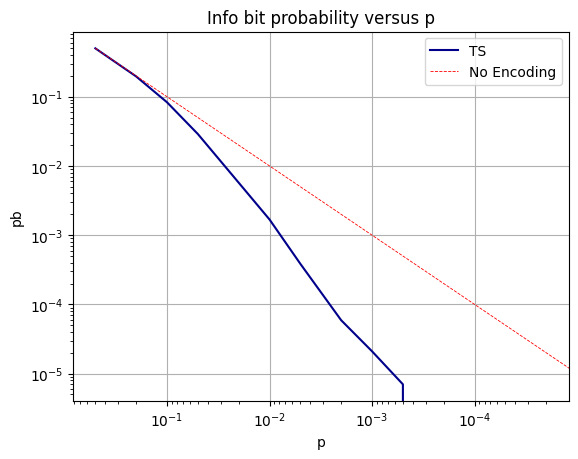

In [5]:
fig, ax = plt.subplots(1, 1)
ax.loglog(ps, info_bit_error_probas, color="darkblue")
ax.invert_xaxis()
ax.grid()
ax.set_title("Info bit probability versus p")
ax.set_xlabel("p")
ax.set_ylabel("pb")

n = [0.5, 0.4, 0.3, 0.2, 0.1, 0]
ax.loglog(n, n, color = "red", linestyle="--", linewidth=0.6)

ax.legend(["TS", "No Encoding"])